In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv ('museMonitor_2022-03-11--18-58-12_9137597212327447832.csv')

In [3]:
df.head()

,TimeStamp,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,...,Gyro_X,Gyro_Y,Gyro_Z,HeadBandOn,HSI_TP9,HSI_AF7,HSI_AF8,HSI_TP10,Battery,Elements
0,2022-03-11 18:58:12.158,0.433241,-0.025626,0.151070,0.527089,0.595104,-0.141682,0.146407,0.428740,0.871169,...,1.315918,-0.261688,1.973877,1.0,1.0,1.0,1.0,1.0,100.0,NaN
1,2022-03-11 18:58:13.171,0.441383,-0.231326,0.060877,0.470033,0.436232,-0.248761,0.121055,0.288715,0.760872,...,0.291595,-0.829926,0.523376,1.0,1.0,1.0,1.0,1.0,100.0,NaN
2,2022-03-11 18:58:13.758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/blink
3,2022-03-11 18:58:14.186,0.708429,0.104065,0.391249,0.744376,0.671069,-0.017970,0.176220,0.662091,1.208579,...,-3.439331,1.914062,4.104767,1.0,1.0,1.0,1.0,1.0,100.0,NaN
4,2022-03-11 18:58:14.725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/blink


In [4]:
df['Delta'] = (df['Delta_AF7'] + df['Delta_AF8']) / 2
df['Theta'] = (df['Theta_AF7'] + df['Theta_AF8']) / 2
df['Alpha'] = (df['Alpha_AF7'] + df['Alpha_AF8']) / 2
df['Beta'] = (df['Beta_AF7'] + df['Beta_AF8']) / 2
df['Gamma'] = (df['Gamma_AF7'] + df['Gamma_AF8']) / 2

df.head()

,TimeStamp,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,...,HSI_AF7,HSI_AF8,HSI_TP10,Battery,Elements,Delta,Theta,Alpha,Beta,Gamma
0,2022-03-11 18:58:12.158,0.433241,-0.025626,0.151070,0.527089,0.595104,-0.141682,0.146407,0.428740,0.871169,...,1.0,1.0,1.0,100.0,NaN,0.062722,0.002363,0.322633,0.329541,0.082674
1,2022-03-11 18:58:13.171,0.441383,-0.231326,0.060877,0.470033,0.436232,-0.248761,0.121055,0.288715,0.760872,...,1.0,1.0,1.0,100.0,NaN,-0.085224,-0.063853,0.188903,0.373952,0.043170
2,2022-03-11 18:58:13.758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,/muse/elements/blink,NaN,NaN,NaN,NaN,NaN
3,2022-03-11 18:58:14.186,0.708429,0.104065,0.391249,0.744376,0.671069,-0.017970,0.176220,0.662091,1.208579,...,1.0,1.0,1.0,100.0,NaN,0.247657,0.079125,0.649723,0.558144,0.332873
4,2022-03-11 18:58:14.725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,/muse/elements/blink,NaN,NaN,NaN,NaN,NaN


# visualization

In [5]:
df_sub = df[['Alpha','Gamma','Beta','Delta','Theta']]
df_sub = df_sub.dropna(how='all')
df_sub

,Alpha,Gamma,Beta,Delta,Theta
0,0.322633,0.082674,0.329541,0.062722,0.002363
1,0.188903,0.043170,0.373952,-0.085224,-0.063853
3,0.649723,0.332873,0.558144,0.247657,0.079125
5,0.788160,0.653479,0.818656,0.565815,0.501121
6,0.693532,0.771362,0.866850,0.386395,0.168366
...,...,...,...,...,...
1962,0.538112,0.496491,0.545738,0.625285,0.212395
1963,0.611591,0.694131,0.943747,0.370146,0.115481
1965,0.435257,0.785085,0.976311,0.148889,-0.099613
1967,0.357517,0.807779,0.910715,0.135612,0.021451


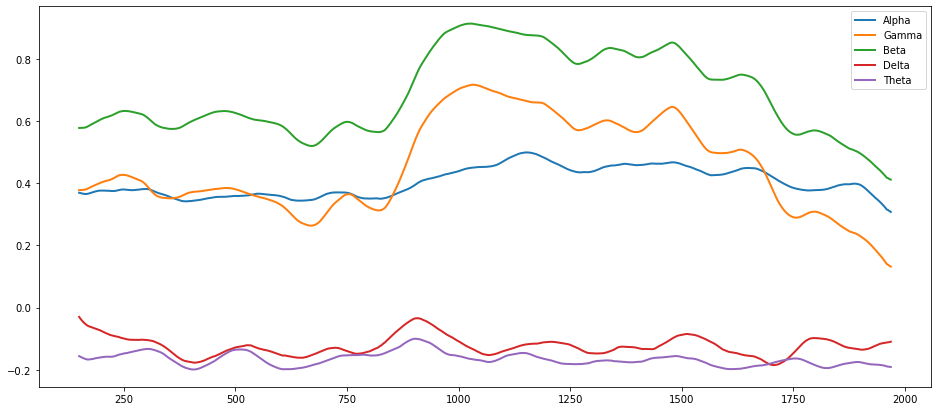

In [17]:
import random

#number_of_colors = len(df_sub.columns)

#color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
#             for i in range(number_of_colors)]


ax = plt.subplot()

#df_roll = df_sub.rolling(window=40).mean()
#ax = df_roll.plot(ax=ax, figsize=(18,10), lw=1, color=color)

df_roll = df_sub.rolling(window=80).mean()
df_roll2 = df_roll.rolling(window=70).mean()
df_roll2.plot(ax=ax, figsize=(16,7), lw=2)

plt.show()